## Here we will set up the simple model without the clouds first

In [1]:
import context
from Integrator_Functions import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from Additional_Functions import create_interp_T, create_interp_solar, create_interp_albedo, temp_ave, create_clouds

class Integ71(Integrator):
    def set_yinit(self):

        ## Set up the latitude array:
        latitudes = np.arange(0, 91, 1)
            
        # Set up the needed constants for the derivation
        solar_arr = create_interp_solar(latitudes)
        albedo_arr = create_interp_albedo(latitudes)
        cloud_arr = create_clouds()
        constants = namedtuple('constants', ['solar', 'albedo', 'clouds'])
        self.initvars = constants(solar_arr, albedo_arr, cloud_arr)

        ## Set up the initial temperature array
        interp_temp = create_interp_T(latitudes)
        self.yinit = interp_temp

        # Set the integrator to array of length 91
        self.nvars = 91
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """arrs.solar=solar insolation
           arrs.albedo=albedo

           returns dT/dt
        """
        ## derivtive is dT/dt = (1/cp)*[(1-arrs.albedo)*arrs.solar - A - B*Temp - F*(Temp-Tavg)]
        As = 315
        Bs = 4.6
        Ac = 201
        Bc = 3.12
        cp = 2.08e8
        F = 3.8
        gamma = 9.8
        Tavg = temp_ave(y)
        Temp = y
        arrs = self.initvars
        f = (1/cp)*((1-arrs.albedo)*(1-arrs.clouds)*arrs.solar - As - Bs*Temp - F*(Temp-Tavg) + Ac + Bc*(Temp - 258.15+273.15 -gamma))
        return f

#to consider the effects of the cloud addition on the albedo, we can multiple the remaning area of free space to the albedo
#for example, if cloud cover = 0.8, albedo = alpha(0.8)

******************************
context imported. Front of path:
/Users/janesharai/repos
back of path: /Users/janesharai/miniconda3/envs/numeric_2024/lib/python3.12/site-packages
******************************

through /Users/janesharai/repos/numeric_2024/ATSC409/context.py


In [2]:
#here, we create a seperate function to calculate just fot the baseline cloud albedo values selected

from Baseline import create_interp_T_base, create_interp_solar_base, create_interp_albedo_base, temp_ave_base, create_clouds_base

class Integ72(Integrator):
    def set_yinit(self):

        ## Set up the latitude array:
        latitudes = np.arange(0, 91, 1)
            
        # Set up the needed constants for the derivation
        solar_arr = create_interp_solar_base(latitudes)
        albedo_arr = create_interp_albedo_base(latitudes)
        cloud_arr = create_clouds_base()
        constants = namedtuple('constants', ['solar', 'albedo', 'clouds'])
        self.initvars = constants(solar_arr, albedo_arr, cloud_arr)

        ## Set up the initial temperature array
        interp_temp = create_interp_T_base(latitudes)
        self.yinit = interp_temp

        # Set the integrator to array of length 91
        self.nvars = 91
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """arrs.solar=solar insolation
           arrs.albedo=albedo

           returns dT/dt
        """
        ## derivtive is dT/dt = (1/cp)*[(1-arrs.albedo)*arrs.solar - A - B*Temp - F*(Temp-Tavg)]
        As = 315
        Bs = 4.6
        Ac = 201
        Bc = 3.12
        cp = 2.08e8
        F = 3.8
        gamma = 9.8
        Tavg = temp_ave(y)
        Temp = y
        arrs = self.initvars
        f = (1/cp)*((1-arrs.albedo)*(1-arrs.clouds)*arrs.solar - As - Bs*Temp - F*(Temp-Tavg) + Ac + Bc*(Temp - 258.15+273.15 -gamma))
        return f

#to consider the effects of the cloud addition on the albedo, we can multiple the remaning area of free space to the albedo
#for example, if cloud cover = 0.8, albedo = alpha(0.8)

In [3]:
## This cell will be used to set up the class we will need to override the derivs function
## Used for testing the integrator atm

theSolver = Integ71('init_conds_simple.yaml')
timeVals, yVals, errorList = theSolver.timeloop5Err()


theSolver_base = Integ72('init_conds_simple.yaml')
timeVals_base, yVals_base, errorList_base = theSolver_base.timeloop5Err()

''

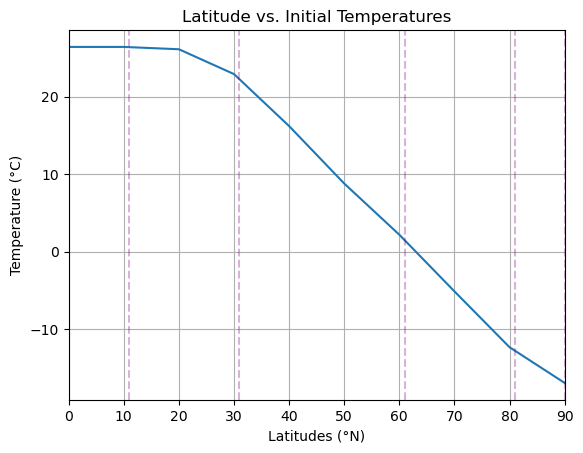

In [4]:
#initial conditions 

initial = yVals[0]
end = yVals[-1]
lat = np.arange(0, 91, 1)

#plot 
plt.plot(lat, initial)

#add labels
plt.title("Latitude vs. Initial Temperatures")
plt.xlabel("Latitudes (°N)")
plt.ylabel("Temperature (°C)")


plt.xticks(np.arange(91, step=10))
plt.xlim(0, 90)
plt.axvline(x=11, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=31, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=61, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=81, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=90, color='purple', linestyle='--', alpha = 0.3)
plt.grid()
;

''

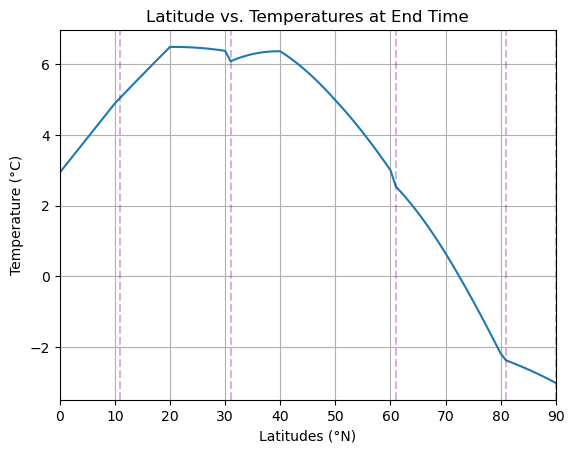

In [5]:
#End Time Plot

plt.plot(lat, end)


plt.title("Latitude vs. Temperatures at End Time")
plt.xlabel("Latitudes (°N)")
plt.ylabel("Temperature (°C)")


plt.xticks(np.arange(91, step=10))
plt.xlim(0, 90)
plt.axvline(x=11, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=31, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=61, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=81, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=90, color='purple', linestyle='--', alpha = 0.3)
plt.grid()

;

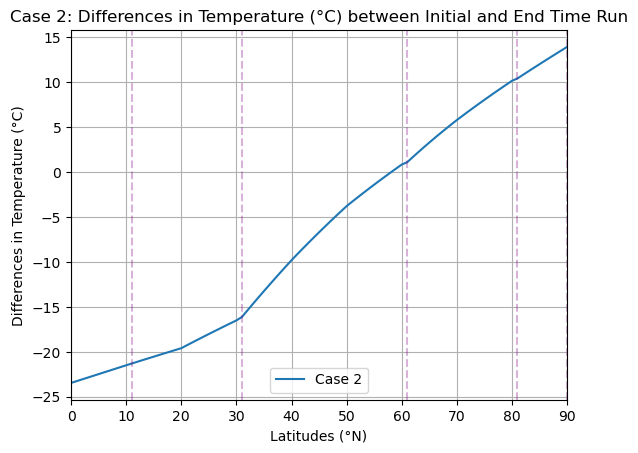

''

In [6]:
#base 
initial_base = yVals_base[0]
end_base = yVals_base[-1]

difference_base = end_base - initial_base

#Difference Plot
difference = end - initial


plt.plot(lat, difference, label = "Case 2")
# plt.plot(lat, difference_base, label = "Base", linestyle = '--')

plt.title('Case 2: Differences in Temperature (°C) between Initial and End Time Run')
plt.xlabel("Latitudes (°N)")
plt.ylabel("Differences in Temperature (°C)")

plt.xticks(np.arange(91, step=10))
plt.xlim(0, 90)

plt.axvline(x=11, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=31, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=61, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=81, color='purple', linestyle='--', alpha = 0.3)
plt.axvline(x=90, color='purple', linestyle='--', alpha = 0.3)
plt.grid()
plt.legend()
plt.show()

;

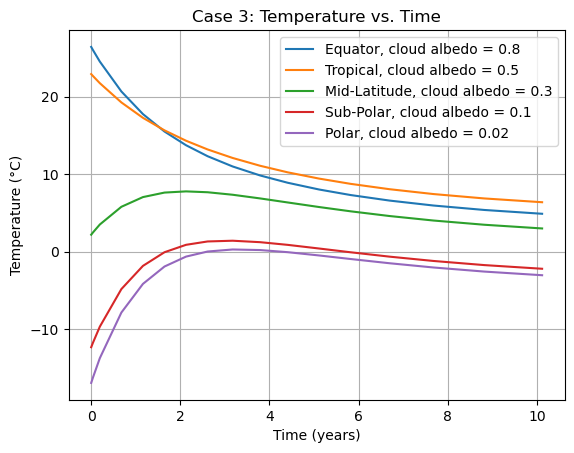

In [7]:
#Plot TimeSeries vs. Temperature for the different sections
time = timeVals/60/60/24/365 #years
time_base = timeVals_base/60/60/24/365 #years

plt.plot(time, yVals[:,10], label = 'Equator, cloud albedo = 0.8')
plt.plot(time, yVals[:,30], label = 'Tropical, cloud albedo = 0.5')
plt.plot(time, yVals[:,60], label = 'Mid-Latitude, cloud albedo = 0.3')
plt.plot(time, yVals[:,80], label = 'Sub-Polar, cloud albedo = 0.1')
plt.plot(time, yVals[:,90], label = 'Polar, cloud albedo = 0.02')


# plt.plot(time_base, yVals_base[:,10],linestyle = '--',  alpha = 0.3, color = 'blue')
# plt.plot(time_base, yVals_base[:,30],linestyle = '--', alpha = 0.3, color = 'orange')
# plt.plot(time_base, yVals_base[:,60],linestyle = '--', alpha = 0.3, color = 'green')
# plt.plot(time_base, yVals_base[:,80],linestyle = '--', alpha = 0.3, color = 'red')
# plt.plot(time_base, yVals_base[:,90],linestyle = '--', alpha = 0.3, color = 'purple')



plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
plt.title("Case 3: Temperature vs. Time") 
plt.legend()
plt.grid()
plt.show()

In [8]:
# #testing difference between adaptive and fixed timestep

# #adaptive
# theSolver = Integ71('init_conds_simple.yaml')
# timeVals, yVals, errorList = theSolver.timeloop5Err()

# #fixed
# theSolver2 = Integ71('init_conds_simple.yaml')
# timeVals2, yVals2, errorList2 = theSolver.timeloop5fixed()

In [9]:
# time = timeVals/3600 #hours
# time2 = timeVals2/3600 #hours

# plt.plot(time, yVals[:,10], label = 'Adaptive Timestep', color = 'red')
# plt.plot(time2, yVals2[:,10], label = "Fixed Timestep")

# plt.xlabel("Time (hours)")
# plt.ylabel("Temperature (°C)")
# plt.title("Temperature vs. Time (at Equator)") 
# plt.legend()
# plt.grid()
# plt.show()     

In [10]:
# timesteps_adapt = len(timeVals)
# timesteps_fixed = len(timeVals2)

# difference = timesteps_fixed - timesteps_adapt

# print("The number of timesteps for the fixed timestep code is", timesteps_fixed)
# print("The number of timesteps for the adaptive timestep code is", timesteps_adapt)

# print("The difference between the number of timesteps for the fixed and adaptive timestep code is", difference)

In [11]:
# computational_steps_fixed = timesteps_fixed*4

# computational_steps_adapt = timesteps_adapt*7

# computational_steps_difference = computational_steps_fixed - computational_steps_adapt

# print("The difference between the computational steps for adaptive and fixed are", computational_steps_difference)
 

# time_faster = computational_steps_fixed/computational_steps_adapt

# print("The adaptive method is", round(time_faster,2), "x times faster that then fixed method.")